### Exploratory Data Analysis on Air Quality Dataset

| Column Name | Data Type | Description | Units |
| -------- | ------- | -------- | ------- |
| Date | Datetime | Date of Monitoring | ------- |
| Time | Datetime | Time of Monitoring| ------- |
| CO(GT) | Integer | True hourly averaged concentration CO in mg/$m^{3}$ (reference analyzer)  |  mg/$m^{3}$|
| PT08.S1(CO) | Categorical | hourly averaged sensor response (nominally CO targeted) | ------- |
| NMHC(GT) | Integer | True hourly averaged overall Non Metanic HydroCarbons concentration in &micro;g/$m^{3}$ (reference analyzer) | &micro;g/$m^{3}$	 |
| C6H6(GT) | Integer | True hourly averaged Benzene concentration in &micro;g/m^3 (reference analyzer) | ------- |
| PT08.S2(NMHC) | Categorical | hourly averaged sensor response (nominally NMHC targeted) | ------- |
| NOx(GT)   | Integer | True hourly averaged NOx concentration in ppb (reference analyzer) | ppb |
| PT08.S3(NOx)   | Categorical | hourly averaged sensor response (nominally NOx targeted) | ------- |
| NO2(GT)   | Integer | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | &micro;g/$m^{3}$ |
| PT08.S4(NO2)   | Categorical | hourly averaged sensor response (nominally NO2 targeted) | ------- |
| PT08.S5(O3)   | Categorical | hourly averaged sensor response (nominally O3 targeted) | ------- |
| T   | Continuous | Temperature | &deg;C |
| RH  | Continuous | Relative Humidity | % |
| AH   | Continuous | Absolute Humidity | ------- |


In [76]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [42]:
# To combine Date and Time column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'].str.replace('.',':'),format= '%d/%m/%Y %H:%M:%S')

# Remove Unnecessary columns including the Date Time we already have a new column, Datetime
df = df.drop(['Date','Time','Unnamed: 15','Unnamed: 16'], axis = 1)
df.head()
  

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [43]:
# Edit the format and type cast mistaken objects into float 
df[['CO(GT)','C6H6(GT)','T','RH','AH']]  = df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply\
    (lambda x: x.str.replace(',','.').astype(float))
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [44]:
# Observe null (NaN) values
df.isnull().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
Datetime         114
dtype: int64

In [51]:
# Remove those NaN values
df = df.dropna()
df.shape

(9357, 14)

In [62]:
# Separating each of the columns by data type
DateTime = df['Datetime']

Categorical_Columns = df[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']]

Feature_Columns = df[['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)','T','RH','AH']]

In [148]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Target Variable
target_var = 'T'

# Response Variables
x = np.array(Feature_Columns.drop(target_var,axis=1))
y = np.array(Feature_Columns[target_var])

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


#MinMaxScaler Instance
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_train_sc

array([[0.96035866, 0.        , 0.        , ..., 0.67407407, 0.        ,
        0.        ],
       [0.95327985, 0.        , 0.79294653, ..., 0.61111111, 0.79078628,
        0.99347973],
       [0.95469561, 0.        , 0.81342435, ..., 0.58888889, 0.83512297,
        0.994397  ],
       ...,
       [0.94950448, 0.        , 0.78536215, ..., 0.48888889, 0.76861794,
        0.99389807],
       [0.95752714, 0.        , 0.82176716, ..., 0.66481481, 0.78489782,
        0.99378829],
       [0.        , 0.        , 0.77664012, ..., 0.        , 0.84793904,
        0.99346984]])

### Implementing an Algorithm

- Predicting the Temperature with Respect to the other Feature Variables (Linear Regression)


In [149]:
model = linear_model.LinearRegression()
model.fit(x_train_sc, y_train)
acc = linear.score(x_test, y_test)
print("Accuracy: ", acc)


Accuracy:  0.9785375771555587


In [136]:
# Saving the model
import pickle

with open("model/airquality_linear.pickle", "wb") as f:
            pickle.dump(model, f)

In [150]:
from sklearn.metrics import mean_squared_error, r2_score
# Perform predictions
x_test_sc = scaler.fit_transform(x_test)
y_pred = model.predict(x_test_sc)


# Model Evaluation Using these Metrics
coeff = model.coef_
inter = model.intercept_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f" Coefficents: {coeff} \n Intercept: {inter} \n MSE: {mse} \n Coeff. of determination (R^2): {r2}")

 Coefficents: [  0.8166277  -11.10388628 107.8437139  -24.87529005   3.40708174
 -77.81906644 199.59537948] 
 Intercept: -195.3473502242647 
 MSE: 43.39540989917769 
 Coeff. of determination (R^2): 0.9737313992571851


In [151]:
# Predicting by a sample input
for x in range(len(y_pred)):
    print(y_pred[x], x_test[x], y_test[x])

10.57880722239048 [   4.6    -200.       19.4     741.      174.       68.7       1.2596] 16.3
14.390147747338176 [   2.3    -200.        9.2     333.      144.       64.5       0.9732] 13.2
17.877278900273296 [   1.7    -200.        6.4     270.      144.       49.9       0.5307] 7.8
15.330657080322112 [  3.3    344.      16.6    209.     117.      65.       1.2945] 17.6
12.987350722812778 [ 4.200e+00 -2.000e+02  2.050e+01  8.150e+02  1.830e+02  5.450e+01
  6.415e-01] 9.3
13.419569446297174 [   0.7    -200.        2.9     121.       81.       70.        0.6997] 6.9
21.050276391662038 [   1.     -200.        2.7     147.      117.       39.6       0.4001] 7.1
30.921818944969516 [   3.6    -200.       19.4     180.      133.       31.4       1.3686] 30.7
16.10701871554255 [   0.6    -200.        2.6      24.       32.       67.1       1.2619] 16.7
19.62827672938488 [-200.     -200.        2.2    -200.     -200.       59.2       0.9601] 14.3
31.49876138008605 [-200.     -200.       14.  

ValueError: x and y must be the same size

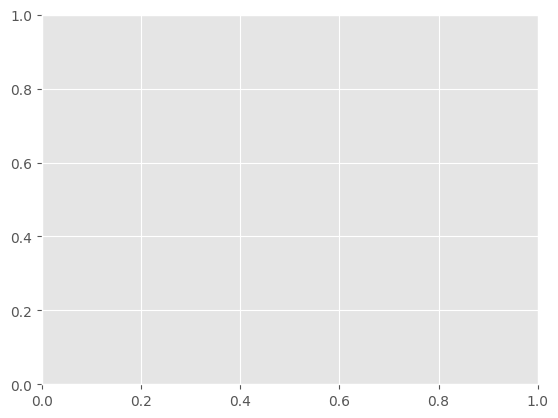

In [153]:
from matplotlib import style

style.use("ggplot")
for x in range(len(y_pred)):
    p = np.y_pred[x]

plt.scatter(p, y_pred)
plt.xlabel(p)
plt.ylabel("Temperature")
plt.show()